In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

In [2]:
# Initialisation 
n = 20
d = 15

l = 10 # lambda (regularization parameter)
Q = 0.5*np.identity(n)
p = -np.random.random(n)
X = np.random.random((n, d))
A = np.vstack((X.T,-X.T))
b = l * np.ones(2*d)
eps = 1e-5
v_o = np.zeros(n)
t = b.shape[0]

In [3]:
def fo(Q,p,A,b,t,v_o): 
    '''
    Q : n * n (nonegative)
    p : n * 1 
    A : 2d * n
    b : 2d * 1 
    t : 1 * 1 
    v_o : n * 1 
    
    '''
    return(np.dot(v_o,np.dot(Q,v_o)) + np.dot(p.T,v_o))   

In [4]:
def ft(Q,p,A,b,t,v_o):
    '''
    output : objective function t f_o + phi
    
    Q : n * n (nonegative)
    p : n * 1 
    A : 2d * n
    b : 2d * 1 
    t : 1 * 1 
    v_o : n * 1 
    '''  
    return(t*(np.dot(v_o.T, np.dot(Q, v_o)) + np.dot(p.T, v_o)) - sum([np.log(b[i]-np.dot(A[i], v_o)) for i in range(b.shape[0])]))

In [5]:
def grad_ft(Q,p,A,b,t,v):
    '''
    output : gradient of ft in v
    
    '''
    return(t*(2*np.dot(Q,v) + p) + sum([A[i].T /((-np.dot(A[i],v) + b[i])) for i in range(2*d)]))

In [11]:
def backtracking(v,dv,Q,p,A,b,t,alpha = 0.1 ,beta = 0.7):
    '''
    output : stepsize
    
    v : n * 1 
    dv : n * 1
    alpha : 1 * 1 in (0,0.5)
    beta : 1 * 1  in (0,1)
    
    Q : n * n (nonegative)
    p : n * 1 
    A : 2n * n
    b : 2n * 1 
    t : 1 * 1 
    '''
    t_bt = 1 
    
    while ( ft(Q,p,A,b,t,v + t_bt*dv) > ft(Q,p,A,b,t,v) + 
           alpha*t_bt*np.dot(grad_ft(Q,p,A,b,t,v),dv)) :
        t_bt = beta*t_bt
    
    return t_bt

In [12]:
def centering_step(Q,p,A,b,t,v_o,eps,nmax=1000):
    '''
    Q : n * n (nonegative)
    p : n * 1 
    A : 2n * n
    b : 2n * 1 
    t : 1 * 1 
    v_o : n * 1 (starting point)
    eps : 1 * 1
    '''

    v = v_o
    v_seq = [v_o]
    ne = 1
    l_nwt = np.dot(grad_ft(Q,p,A,b,t,v),np.dot(inv(compute_hessian(Q,A,b,t,v)),grad_ft(Q,p,A,b,t,v).T))
    
     
    while (l_nwt > 2*eps)&(ne<nmax):

        dv = -np.dot(inv(compute_hessian(Q,A,b,t,v)),compute_gradient(Q,p,A,b,t,v))
        
        l_nwt = np.dot(compute_gradient(Q,p,A,b,t,v).T,np.dot(inv(compute_hessian(Q,A,b,t,v)),compute_gradient(Q,p,A,b,t,v)))
        
        t_bt = backtracking(v,dv,Q,p,A,b,t,alpha = 0.1 ,beta = 0.7)
        
        v = v + t_bt*dv
        
        v_seq.append(v)
    
        ne = ne + 1
    
    return(v_seq[ne-1],ne)  

In [15]:
def barr_method(Q,p,A,b,v_o,eps,mu,nmax=1000):
    '''
    Q : n * n (nonegative)
    p : n * 1 
    A : 2n * n
    b : 2n * 1 
    t : 1 * 1 
    v_o : n * 1 (starting point)
    eps : 1 * 1
    
    '''
    m = b.shape[0]
    t = 1
    neb = 0
    vseq = [v_o]
    f_seq =[fo(Q,p,A,b,t,v_o)]
    
    while (m/t > eps):
        vtemp, ne = centering_step(Q,p,A,b,t,v_o,eps)
        print(vtemp)
        vseq.append(vtemp)
        t = mu*t 
        neb += 1
        f_seq.append(fo(Q,p,A,b,t,vtemp))

        
    return(vseq,f_seq,neb)

[ 0.53964385  0.23029645 -0.02413378 -0.16133363 -0.1306439   0.2185504
  0.33867111  0.0947679   0.38196634  0.00468297  0.15386861  0.18062203
  0.53511378  0.11454069 -0.10065721  0.31453462  0.63594819  0.11092674
  0.29425527  0.36532536]
[ 0.61135747  0.32461449  0.06668511 -0.1036451  -0.05744589  0.31900237
  0.4214591   0.18790797  0.4697413   0.0791373   0.24141579  0.27508092
  0.60962305  0.20033749 -0.05896257  0.41121251  0.70818227  0.18469968
  0.39204349  0.43857041]
[ 0.67468116  0.40900309  0.14962524 -0.0497467   0.01067033  0.41040335
  0.49648285  0.27295284  0.54883693  0.14732085  0.32147998  0.3622632
  0.67696439  0.27879511 -0.02080035  0.49823804  0.77401961  0.25298592
  0.47968435  0.50465459]
[ 0.72301496  0.47385822  0.21406013 -0.00773764  0.06362268  0.48117468
  0.55427527  0.3388902   0.61007247  0.20017235  0.38368253  0.43003799
  0.72869311  0.33982121  0.00886601  0.565397    0.82518478  0.30613378
  0.54704133  0.55582538]
[0.75562551 0.51780968

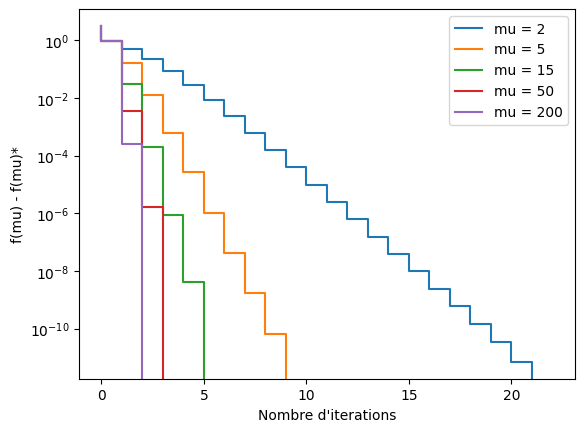

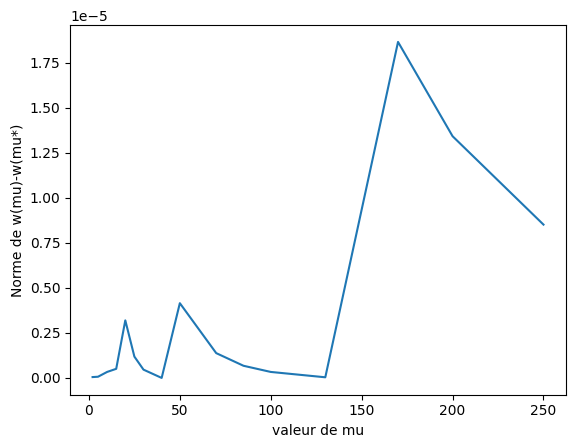

In [16]:
#Plot 
mu_list_bis = [2, 5, 10, 15, 20, 25, 30, 40, 50, 70, 85, 100, 130, 170, 200, 250]
mu_list = [2,5,15,50,150,200,300]
f_star_list =[]
w_star_list =[]

for mu in mu_list_bis :
    vseq, fseq, nb_iter = barr_method(Q,p,A,b,v_o,eps,mu)
    f_star = fseq[-1]
    f_star_list.append(f_star)
    w_star = np.linalg.lstsq(X,vseq[-1]+p,rcond=None)[0]
    w_star_list.append(w_star)
    if mu in mu_list :
        plt.step([i for i in range(nb_iter+1)],fseq - f_star,label='mu = '+str(mu))

plt.legend()
plt.ylabel("f(mu) - f(mu)*")
plt.xlabel("Nombre d'iterations")
plt.semilogy()
plt.show()

#Plot de w en fonction de mu 
mu_min = np.argmin(f_star_list)
plt.figure()

w_error = [np.linalg.norm (w -w_star_list[mu_min]) for w in w_star_list]
plt.plot(mu_list_bis,w_error)
plt.ylabel("Norme de w(mu)-w(mu*)")
plt.xlabel("valeur de mu")
plt.show()
